In [1]:
pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

Processing ./mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose_hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=132359 sha256=93cec738f22f72a5ee54c3f6f66c24050a76d6798e49fa2afd94f4b75267f2ca
  Stored in directory: /private/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/pip-ephem-wheel-cache-x4255bo8/wheels/77/c5/de/7a63a2c78a12ad335a5091a9209439e12d86616744464a5ae4
Successfully built mlrose_hiive
  Attempting uninstall: mlrose_hiive
    Found existing installation: mlrose_hiive 2.2.4
    Uninstalling mlrose_hiive-2.2.4:
      Successfully uninstalled mlrose_hiive-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
"""
# B.
def border_swap(problem, next_gen, child, schedule):
    if schedule is None:
        print("order is none.")
        return next_gen
    if len(next_gen) == 0:
        next_gen.append(child)
    else:
        for i in schedule:
            if schedule[i] == -1 and i < len(schedule) - 1:
                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]
        temp_schedule = [i for i in schedule if i != -1]
        #if problem.eval_fitness(temp_schedule) > problem.eval_fitness(child):
        next_gen.append(temp_schedule)
    return next_gen
"""

'\n# B.\ndef border_swap(problem, next_gen, child, schedule):\n    if schedule is None:\n        print("order is none.")\n        return next_gen\n    if len(next_gen) == 0:\n        next_gen.append(child)\n    else:\n        for i in schedule:\n            if schedule[i] == -1 and i < len(schedule) - 1:\n                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]\n        temp_schedule = [i for i in schedule if i != -1]\n        #if problem.eval_fitness(temp_schedule) > problem.eval_fitness(child):\n        next_gen.append(temp_schedule)\n    return next_gen\n'

In [3]:
import mlrose_hiive as mh

In [4]:
#help(mh.runners)

In [5]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [6]:
import pandas as pd
import utility as u
import importlib

In [7]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [8]:
size = 7
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [9]:
with open(f"{size}_tasks.txt", "a") as f:
    for t in tasks:
        print(t.task_id, t.duration, t.deadline, t.profit, file=f)


In [10]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [11]:
problem_ffp.length

7

In [12]:
problem_ffp.fitness

64.0

In [13]:
# GA runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[40, 50, 60],
              mutation_rates=[0.07, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [14]:
df_run_curves_ffp.shape

(3139, 7)

In [15]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.001504,80.0,0.0,40,0.07,2048
1,1,0.015191,105.0,2.0,40,0.07,2048
2,2,0.023021,110.0,4.0,40,0.07,2048
3,3,0.034162,114.0,6.0,40,0.07,2048
4,4,0.037985,114.0,7.0,40,0.07,2048


In [16]:
df_run_curves_ffp['Fitness'].max()

161.0

In [17]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
16,16,0.134241,161.0,24.0,40,0.07,2048
17,17,0.147767,161.0,25.0,40,0.07,2048
18,18,0.158496,161.0,26.0,40,0.07,2048
19,19,0.182946,161.0,27.0,40,0.07,2048
20,20,0.190837,161.0,28.0,40,0.07,2048
...,...,...,...,...,...,...,...
3134,520,0.028485,161.0,532.0,60,0.08,2048
3135,521,0.031624,161.0,533.0,60,0.08,2048
3136,522,0.044390,161.0,534.0,60,0.08,2048
3137,523,0.049069,161.0,535.0,60,0.08,2048


In [18]:
# need to check Time and FEvals

In [22]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [23]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
16,16,0.134241,161.0,24.0,40,0.07,2048
17,17,0.147767,161.0,25.0,40,0.07,2048
18,18,0.158496,161.0,26.0,40,0.07,2048
19,19,0.182946,161.0,27.0,40,0.07,2048
20,20,0.190837,161.0,28.0,40,0.07,2048
...,...,...,...,...,...,...,...
3134,520,0.028485,161.0,532.0,60,0.08,2048
3135,521,0.031624,161.0,533.0,60,0.08,2048
3136,522,0.044390,161.0,534.0,60,0.08,2048
3137,523,0.049069,161.0,535.0,60,0.08,2048


In [24]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,40,0.07,24.0,266.0,0.134241
1,40,0.08,25.0,267.0,0.000913
2,50,0.07,39.0,281.0,0.000913
3,50,0.08,26.0,265.0,0.124712
4,60,0.07,39.0,280.0,0.000913
5,60,0.08,36.0,274.0,0.000913


In [20]:
# tentatively, pick pop size = 50 and mutation_rate = 0.08

In [25]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.001504,80.0,0.0,40,0.07,2048
1,1,0.015191,105.0,2.0,40,0.07,2048
2,2,0.023021,110.0,4.0,40,0.07,2048
3,3,0.034162,114.0,6.0,40,0.07,2048
4,4,0.037985,114.0,7.0,40,0.07,2048


In [27]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [28]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[50], # 20 bits in total
              mutation_rates=[0.08])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [29]:
df_iter_curves_ffp.shape

(5187, 7)

In [30]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003559,80.0,0.0,50,0.08,2048
1,1,0.028637,108.0,2.0,50,0.08,2048
2,2,0.043016,117.0,4.0,50,0.08,2048
3,3,0.053817,123.0,6.0,50,0.08,2048
4,4,0.062218,123.0,7.0,50,0.08,2048


In [31]:
df_iter_curves_ffp.Fitness.max()

161.0

In [32]:
df_iter_curves_ffp.to_csv(f'gab_mutate_js_{size}.csv')

In [1]:
import pandas as pd
import numpy as np
size = 7
df_iter_curves_ffp = pd.read_csv(f'../../csv-files/gab_mutate_js_{size}.csv')

In [33]:
df_iter_curves_ffp.Iteration.max()

526

In [2]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [35]:
df_fitness_iter_ffp.shape

(527, 3)

In [36]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,79.0,336.444444
1,1,107.0,34.444444
2,2,113.6,15.600000
3,3,117.6,21.377778
4,4,121.7,39.788889


In [37]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

15      15
16      16
17      17
18      18
19      19
      ... 
512    512
513    513
514    514
515    515
516    516
Name: Iteration, Length: 5010, dtype: int64

In [5]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

26

In [6]:
converge_iter = df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

In [39]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [40]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,79.0,336.444444,18.342422
1,1,107.0,34.444444,5.868939
2,2,113.6,15.600000,3.949684
3,3,117.6,21.377778,4.623611
4,4,121.7,39.788889,6.307843


Text(0, 0.5, 'Fitness')

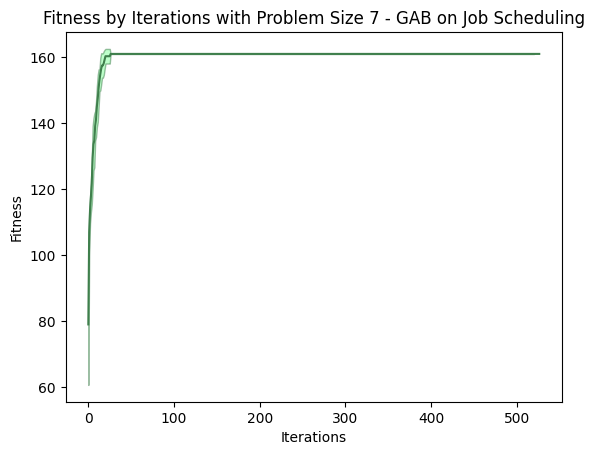

In [41]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title(f'Fitness by Iterations with Problem Size {size} - GAB on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [42]:
df_fitness_iter_ffp.avg_fitness.max()

161.0

In [43]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

9.548123724935001

In [44]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(0    0
 Name: Iteration, dtype: int64,)

In [45]:
# Fevals - iteration

In [3]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [47]:
df_FEvals_iter_ffp.shape

(527, 3)

In [48]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.9,0.100000
2,2,3.7,0.455556
3,3,5.3,0.900000
4,4,6.8,0.844444


In [4]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [7]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
26,26,34.6,2.488889,1.577621


In [50]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 2.0789954839350235)

In [51]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.9,0.100000,0.316228
2,2,3.7,0.455556,0.674949
3,3,5.3,0.900000,0.948683
4,4,6.8,0.844444,0.918937


Text(0, 0.5, 'FEvals')

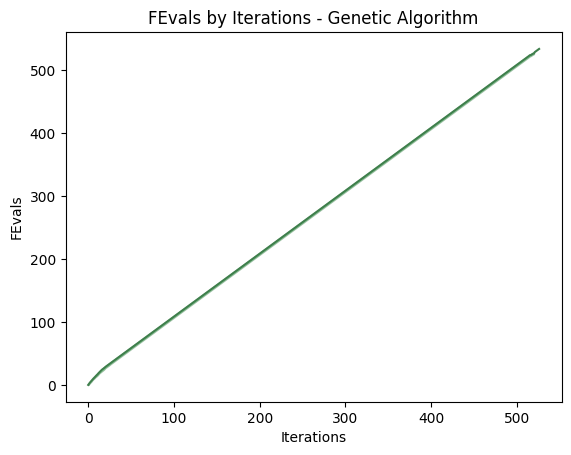

In [52]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [53]:
# fitness - wall clock time

In [8]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [55]:
df_time_iter_ffp.shape

(527, 3)

In [56]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.001251,7.970741e-07
1,1,0.015014,3.247974e-05
2,2,0.026845,7.699840e-05
3,3,0.037802,1.175458e-04
4,4,0.045186,1.691082e-04


In [57]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [58]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.001251,7.970741e-07,0.000893
1,1,0.015014,3.247974e-05,0.005699
2,2,0.026845,7.699840e-05,0.008775
3,3,0.037802,1.175458e-04,0.010842
4,4,0.045186,1.691082e-04,0.013004


Text(0, 0.5, 'Time')

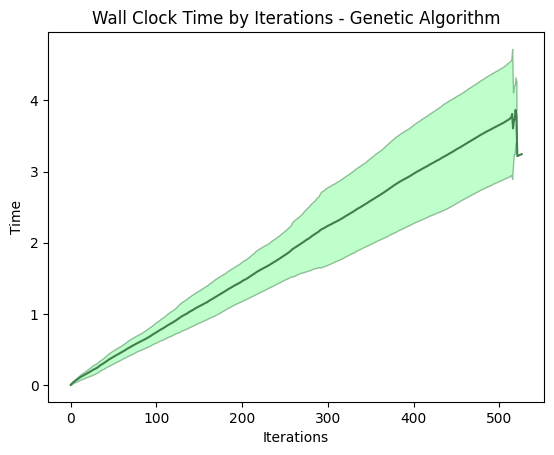

In [59]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [60]:
df_time_iter_ffp.stddev_time.max()

0.9141104262942067

In [61]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

515    515
Name: Iteration, dtype: int64

In [62]:
df_time_iter_ffp.avg_time.max()

3.866617892505019

In [9]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_time,var_time
26,26,0.211194,0.004256
